In [90]:
import pandas as pd
import numpy as np

from datetime import datetime
from scipy import optimize
from scipy import integrate

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns


sns.set(style='darkgrid')

mpl.rcParams['figure.figsize']=(16,9)
pd.set_option('display.max_rows',500)


In [91]:
df_analyse=pd.read_csv('../data/processed/COVID_small.csv', sep=';')
df_analyse.sort_values('date', ascending=True).head()

,date,Italy,US,Spain,Germany,Korea/South
0,2020-01-22,0,1,0,0,0
1,2020-01-23,0,1,0,0,0
2,2020-01-24,0,2,0,0,0
3,2020-01-25,0,2,0,0,0
4,2020-01-26,0,5,0,0,0


In [92]:
df_analyse.Germany[45]

799

In [147]:
N0=1000000
beta=0.4
gamma=0.1

I0=df_analyse.Germany[45]
S0=N0-I0
R0=0

In [148]:
def SIR_model(SIR,beta,gamma):
    '''Simple SIR model 
       S: susceptible population
       I: infected people
       R: recovered people
       beta:
       overall condition is that the sum of changes (differences) sum up to 0
       ds+dI+dR=0
       S+I+R=N (constant size of population)
       
    '''
    S,I,R=SIR
    dS_dt=-beta*S*I/N0
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return([dS_dt,dI_dt,dR_dt])

In [149]:
SIR=np.array([S0,I0,R0])
propagation_rates=pd.DataFrame(columns={'susceptible':S0,
                                       'infected':I0,
                                       'recovered':R0})

for each_t in np.arange(100):
    
    new_delta_vec=SIR_model(SIR,beta,gamma)
    
    SIR=SIR+new_delta_vec
    
    propagation_rates=propagation_rates.append({'susceptible':SIR[0],
                                               'infected':SIR[1],
                                               'recovered':SIR[2]}, ignore_index=True)
    

C:\Users\bansi\Anaconda3\lib\site-packages\pandas\core\indexes\range.py:711: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  return super().__getitem__(key)
C:\Users\bansi\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\bansi\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


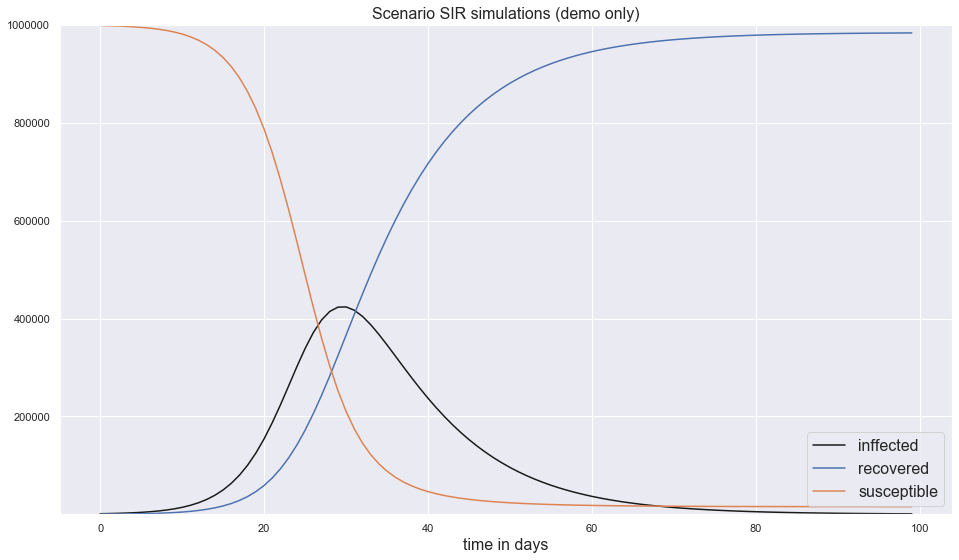

In [150]:
fig, ax1= plt.subplots(1,1)

ax1.plot(propagation_rates.index, propagation_rates.infected, label='inffected', color='k')
ax1.plot(propagation_rates.index, propagation_rates.recovered, label='recovered')
ax1.plot(propagation_rates.index, propagation_rates.susceptible, label='susceptible')

ax1.set_ylim(10,1000000)
ax1.set_yscale('linear')
ax1.set_title('Scenario SIR simulations (demo only)', size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best', 
          prop={'size':16});

# Fitting the parameters of SIR model

In [151]:
ydata= np.array(df_analyse.Germany[35:])
t=np.arange(len(ydata))

In [152]:
I0 = ydata[0]
S0=1000000
R0=0
beta

0.4

In [153]:
def SIR_model(SIR,t,beta,gamma):
    '''Simple SIR model 
       S: susceptible population
       I: infected people
       R: recovered people
       beta:
       overall condition is that the sum of changes (differences) sum up to 0
       ds+dI+dR=0
       S+I+R=N (constant size of population)
    '''
    S,I,R=SIR
    dS_dt=-beta*S*I/N0
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return dS_dt,dI_dt,dR_dt

In [154]:
def fit_odeint(x, beta, gamma):
    return integrate.odeint(SIR_model,(S0,I0,R0),t, args=(beta,gamma))[:,1]

In [155]:
popt=[0.4,0.1]
fit_odeint(t, *popt)

array([2.70000000e+01, 3.64461007e+01, 4.91966833e+01, 6.64075008e+01,
       8.96383381e+01, 1.20994097e+02, 1.63315009e+02, 2.20432987e+02,
       2.97516902e+02, 4.01537287e+02, 5.41891102e+02, 7.31240521e+02,
       9.86636858e+02, 1.33102263e+03, 1.79523180e+03, 2.42064024e+03,
       3.26265435e+03, 4.39525934e+03, 5.91687126e+03, 7.95772492e+03,
       1.06889443e+04, 1.43332139e+04, 1.91764874e+04, 2.55792697e+04,
       3.39844923e+04, 4.49167073e+04, 5.89643268e+04, 7.67336852e+04,
       9.87628191e+04, 1.25387758e+05, 1.56569369e+05, 1.91715994e+05,
       2.29568180e+05, 2.68224802e+05, 3.05358881e+05, 3.38593262e+05,
       3.65921266e+05, 3.86026901e+05, 3.98409242e+05, 4.03309039e+05,
       4.01508711e+05, 3.94096301e+05, 3.82260196e+05, 3.67144307e+05,
       3.49764662e+05, 3.30974003e+05, 3.11457875e+05, 2.91748230e+05,
       2.72244800e+05, 2.53238254e+05, 2.34931993e+05, 2.17461167e+05,
       2.00908526e+05, 1.85317256e+05, 1.70701154e+05, 1.57052578e+05,
      

In [156]:
popt, pcov = optimize.curve_fit(fit_odeint, t, ydata)
perr = np.sqrt(np.diag(pcov))

print('standard deviation errors :', str(perr), 'start infect :', ydata[0])
print("Optimal parameters: beta =", popt[0], "and gamma=", popt[1])


C:\Users\bansi\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in double_scalars
  if sys.path[0] == '':
C:\Users\bansi\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in double_scalars
  del sys.path[0]
C:\Users\bansi\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\Users\bansi\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


standard deviation errors : [0.00224949 0.00203519] start infect : 27
Optimal parameters: beta = 0.12049725793485994 and gamma= 0.04135015595407257


In [157]:
fitted = fit_odeint(t, *popt)

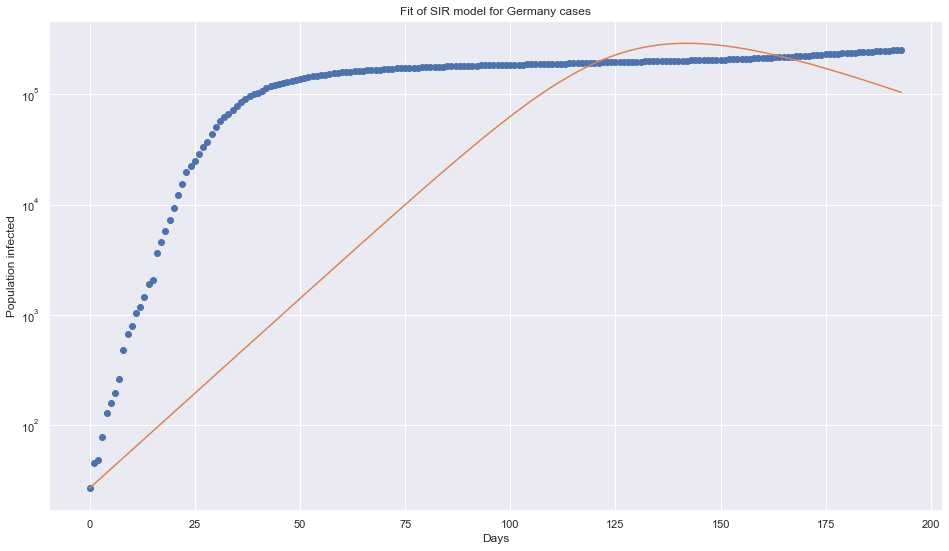

Optional parameters: beta = 0.12049725793485994 and gamma= 0.04135015595407257


In [158]:
plt.semilogy(t, ydata, 'o')
plt.semilogy(t, fitted)
plt.title("Fit of SIR model for Germany cases")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.show()
print("Optional parameters: beta =", popt[0], "and gamma=", popt[1])

# Dynamic beta in SIR (infection rate)

In [228]:
t_initial=21
t_intro_measures=35
t_hold=15
t_relax=50

beta_max=0.4
beta_min=0.11
gamma=0.1

pd_beta=np.concatenate((np.array(t_initial*[beta_max]),
                      np.linspace(beta_max,beta_min,t_intro_measures),
                      np.array(t_hold*[beta_min]),
                      np.linspace(beta_min,beta_max,t_relax)))

pd_beta

array([0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.39147059, 0.38294118, 0.37441176,
       0.36588235, 0.35735294, 0.34882353, 0.34029412, 0.33176471,
       0.32323529, 0.31470588, 0.30617647, 0.29764706, 0.28911765,
       0.28058824, 0.27205882, 0.26352941, 0.255     , 0.24647059,
       0.23794118, 0.22941176, 0.22088235, 0.21235294, 0.20382353,
       0.19529412, 0.18676471, 0.17823529, 0.16970588, 0.16117647,
       0.15264706, 0.14411765, 0.13558824, 0.12705882, 0.11852941,
       0.11      , 0.11      , 0.11      , 0.11      , 0.11      ,
       0.11      , 0.11      , 0.11      , 0.11      , 0.11      ,
       0.11      , 0.11      , 0.11      , 0.11      , 0.11      ,
       0.11      , 0.11      , 0.11591837, 0.12183673, 0.12775

In [229]:
def SIR_model(SIR,each_beta,gamma):
    '''Simple SIR model 
       S: susceptible population
       I: infected people
       R: recovered people
       beta:
       overall condition is that the sum of changes (differences) sum up to 0
       ds+dI+dR=0
       S+I+R=N (constant size of population)
       
    '''
    S,I,R=SIR
    dS_dt=-each_beta*S*I/N0
    dI_dt=each_beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return([dS_dt,dI_dt,dR_dt])

In [230]:
SIR=np.array([S0,I0,R0])
propagation_rates=pd.DataFrame(columns={'susceptible':S0,
                                       'infected':I0,
                                       'recovered':R0})

for each_beta in pd_beta:
    
    new_delta_vec=SIR_model(SIR,each_beta,gamma)
    
    SIR=SIR+new_delta_vec
    
    propagation_rates=propagation_rates.append({'susceptible':SIR[0],
                                               'infected':SIR[1],
                                               'recovered':SIR[2]}, ignore_index=True)

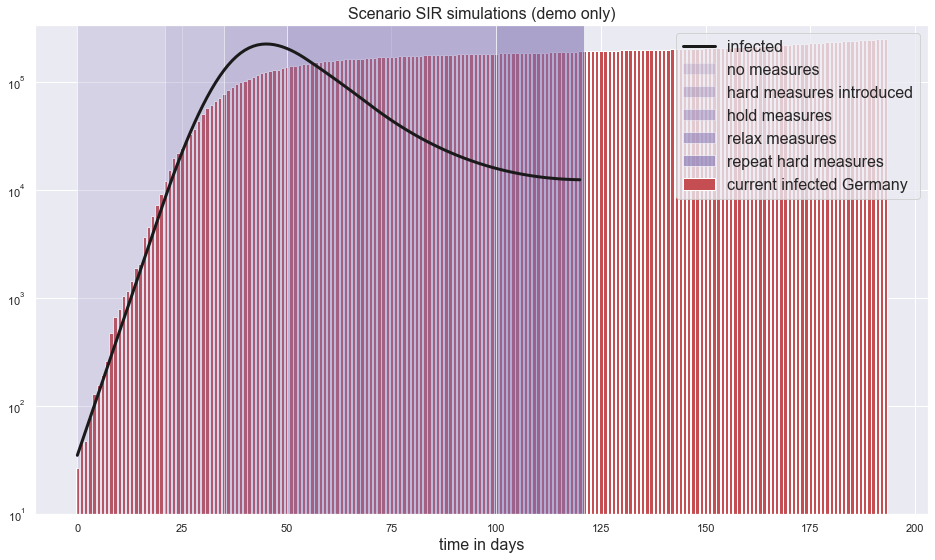

In [231]:
fig, ax1= plt.subplots(1,1)

ax1.plot(propagation_rates.index, propagation_rates.infected, label='infected', color='k', linewidth=3)

t_phases=np.array([t_initial,t_intro_measure,t_hold,t_relax]).cumsum()

ax1.bar(np.arange(len(ydata)), ydata, width=0.8, label='current infected Germany', color='r')

ax1.axvspan(0,t_phases[0], facecolor='m', alpha=0.2, label='no measures')
ax1.axvspan(t_phases[0],t_phases[1], facecolor='m', alpha=0.3, label='hard measures introduced')
ax1.axvspan(t_phases[1],t_phases[2], facecolor='m', alpha=0.4, label='hold measures')
ax1.axvspan(t_phases[2],t_phases[3], facecolor='m', alpha=0.5, label='relax measures')
ax1.axvspan(t_phases[3],len(propagation_rates.infected), facecolor='m', alpha=0.6, label= 'repeat hard measures')

ax1.set_ylim(10,1.5*max(propagation_rates.infected))
ax1.set_yscale('log')
ax1.set_title('Scenario SIR simulations (demo only)', size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best', 
          prop={'size':16});